### Clustering and T-SNE Learning (without pipeline)

---


### A. Import Python Modules and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import metrics #needed for Silhouette method
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [ ]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df.tail()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df = df.dropna()
df.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
LE = preprocessing.LabelEncoder()
df['artists'] = LE.fit_transform(df['artists'])
df['album'] = LE.fit_transform(df['album_name'])
df['track_id'] = LE.fit_transform(df['track_id'])
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,album
0,0,62845,10357,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,8100
1,1,55667,3287,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,14796
2,2,19766,12397,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,39162
3,3,77941,14839,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,8580
4,4,68241,5255,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,16899


In [ ]:
df.drop(columns=["track_genre","album_name","track_name","Unnamed: 0"], inplace=True, errors='ignore')

bool_mapper = {
    False: 0,
    True: 1,
}

df['explicit'] = df['explicit'].replace(bool_mapper)
df.tail()

<ipython-input-6-4e452856e150>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['explicit'] = df['explicit'].replace(bool_mapper)


,track_id,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album
113995,25198,22486,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,66
113996,19583,22486,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,66
113997,80126,4952,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,5028
113998,30455,18534,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,7238
113999,31077,4952,22,241826,0,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,24357


In [ ]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (113999, 18)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

---

### Scatterplot




In [ ]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

---
### K-Means Clustering (Roy)

Number of clusters $k$.

First, to find the best value of k, use the Silhouette co-efficient. The one with the highest co-efficient is the ideal k-value

In [ ]:
for n_cluster in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2122810817567695
For n_clusters=3, The Silhouette Coefficient is 0.1772633381840174
For n_clusters=4, The Silhouette Coefficient is 0.13042724988764703
For n_clusters=5, The Silhouette Coefficient is 0.12726224598193933
For n_clusters=6, The Silhouette Coefficient is 0.12418424002775529
For n_clusters=7, The Silhouette Coefficient is 0.14987480911303255
For n_clusters=8, The Silhouette Coefficient is 0.14583403651600974
For n_clusters=9, The Silhouette Coefficient is 0.11474267441719287
For n_clusters=10, The Silhouette Coefficient is 0.13432762981916221


In [ ]:
k = 2

#### Run k-Means

In [ ]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [ ]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

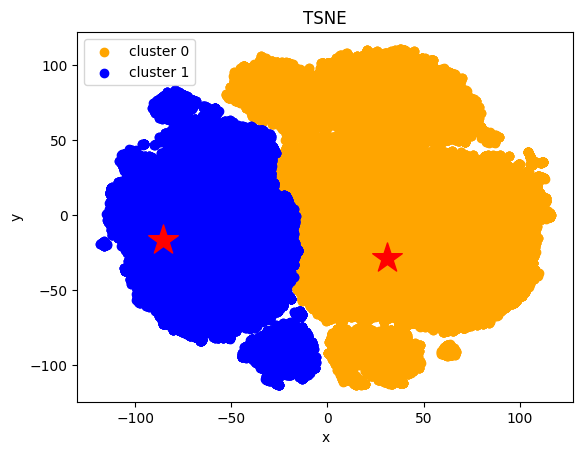

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [ ]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [ ]:
df.head()

,track_id,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album,cluster
0,62845,10357,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,8100,1
1,55667,3287,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,14796,0
2,19766,12397,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,39162,0
3,77941,14839,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,8580,0
4,68241,5255,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,16899,0


In [ ]:
df.tail()

,track_id,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album,cluster
113995,25198,22486,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,66,0
113996,19583,22486,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,66,1
113997,80126,4952,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,5028,1
113998,30455,18534,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,7238,0
113999,31077,4952,22,241826,0,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,24357,1


#### Compute the mean value of each attribute for each cluster

In [ ]:
df.groupby('cluster').mean()

,track_id,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album
cluster,,,,,,,,,,,,,,,,,,
0,44736.720009,15729.020349,33.004251,225152.667079,0.077654,0.557743,0.626522,4.944318,-8.417333,1.0,0.080943,0.338867,0.144390,0.215564,0.478359,122.160621,3.896176,22544.094234
1,45081.656034,15785.181858,33.651459,233094.594583,0.099303,0.582734,0.667526,5.950845,-7.980344,0.0,0.091178,0.272759,0.176563,0.210018,0.466513,122.124957,3.917857,22556.653759


#### Conclusion
I started with k=2 until doing Section G

By looking at the table above we can argue that:

With k=2
* Cluster 0 are clients who subscribed to the marketing campaign
* Cluster 1 are clients who did not subscribe to the marketing campaign.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._

# Clustering with DBScan (Adam)

# G - Sum of Squared distances


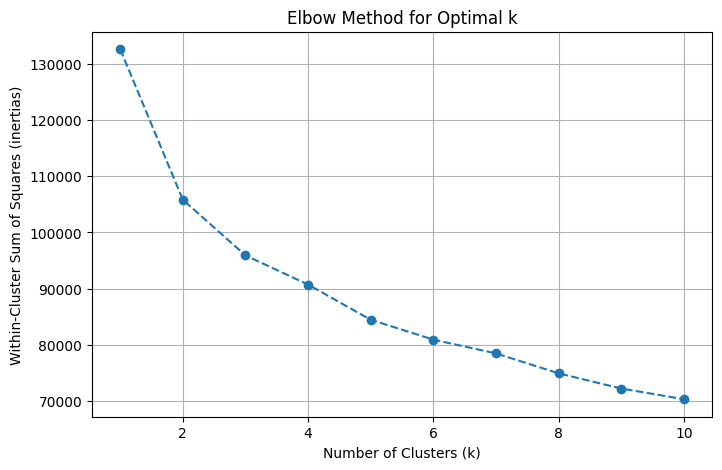

In [ ]:
inertias = [] # the sum of squared distances
k_values = range(1, 11)

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (inertias)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

As there's no hard elbow for this, it is less definitive the value of k. It starts flattening out on its descent at k=3, so I tried that in the above section.